### Resources:
---
* (✔) You are given a dataset called ‘heritage’ which consists of the images of heritage buildings
   *  There are 5 images: altar, bell_tower, dome_outer, dome_inner, and stain_glass
   *  (✔) Dataset is already divided into train and test parts.
   *  (✔) Each class of images are in its own folder: altar, apse, bell tower, column, dome_inner, dome_outer, flying_buttress, gargoyle, stained glass, vault
* (✔) The images are in color (RGB)
* (✔) The images in the dataset are all 64x64, so you do not need any ‘size’ transformation
    * (✔) For normalization, use mean=[0.4390, 0.4216, 0.4020]
    * (✔) For normalization, use std=[0.2130, 0.2131, 0.2275]
---

### Guidelines
---
* All the concepts are provided in the instructional videos and examples.
* Implementation and making it work will require you to use your understanding of the concepts
* Use basic logical reasoning
* You can experiment with your own batch sizes, model architecture and other hyperparameters in general while building this application as other values may generate better results.
* Structure your Jupyter Notebook well with comments explaining what parts of your
code is doing.
---


### Instructions
---
1. (✔) Use the instructional video on ImageFolder class
    * (✔) Read the data using ImageLoader
    * (✔) Create the dataset function/class
    * (✔) Create the dataloader function/class
2. (✔) Test that everything is working up to this point
    * (✔) Display some images
3. Build the CNN model class
    * (✔) In the __init__ method, choose the number of convolution layers you want to have, the output channels per layer, the kernel size, and padding if any. Remember that the images are in color (RGB).
    * (✔) Choose how many Linear fcn layers you want. Remember that the final outputs should be the number of classes in the dataset.
    * (✔) Remember to compute the final image size to determine the total number of inputs to the first fully connected layer (unrolling or flattening of the last convolution layer).
    * (✔) Use the ReLU activation function.
    * (✔) Use Dropout if you choose to.
    * (✔) Use the standard (2,2) MaxPool layer in which ever convolutional layers you choose to use it.
    * (✔) Develop the forward method
4. (✔) Instantiate an object for the model class.
5. (✔) Run the “summary” function to make sure the model is properly built.
6. (✔) Initialize the learning rate
7. (✔) Initialize the CrossEntropy loss function
8. (✔) Initialize the Adam optimizer
9. (✔) Initialize some variables to store the train and test losses and accuracy values for each epoch
10. (✔) Create a train function
11. (✔)Create a test function
12. (1/2) Develop the train-test loop. Use either functions or just a ‘for’ loop for the number of epochs.
13. (✔) Do the training for just 2 epochs and make sure it all works. 
14. (✔) If everything is ok, run the train test loop for about 30+ epochs (could take 15mins to an hour)
15. (✔) Print the progress and you should see the loss values generally going down with every epoch. 
    * If it is not going down, interrupt the ‘for’ loop, and play around with learning rates or batch sizes.
16. (✔) Plot the epochs versus loss curve based on the train and test losses saved per epoch.
17. (✔) Use the model you built on provided new images to predict which class they belong to 
    * (✔) Please note that the new images are from the internet and may all be of different sizes.
    * (✔) Apart from the other transformations, they will also need the size to be transformed to 64x64.
---

In [1]:
'''Import standard data sceince libraries'''
from matplotlib import pyplot as plt # used for plotting graphs
import pandas as pd # used for data manipulation and analysis
import numpy as np # used for numerical computing
import os # used for file handling

'''Import image processing libraries'''
from skimage.io import imsave # used for saving images
from skimage.io import imread # used for reading images
from skimage import io # used for reading and saving images
from skimage import transform # used for resizing images
from PIL import Image # used for image processing

'''Import Torch Libraries'''
import torch # Pytorch
import torch.optim as optim # Pytorch Optimizer
import torch.nn as nn # Pytorch Neural Network
import torch.nn.functional as F # Pytorch Functional Neural Network
from torch.utils.data import Dataset # used for creating custom dataset
from torch.utils.data import DataLoader # used for loading data
from torch.utils.data.dataset import random_split # used for splitting dataset
import torchvision.transforms as transforms # used for transforming images
from torchsummary import summary  # used for displaying model summary
import torchvision.datasets as datasets # Important library for this lesson
import torchvision.models as models # used for pre-trained models


'''Import warnings module to ignore warnings'''
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Set manual seed for the torch randomly generated parameters to have same values'''
torch.manual_seed(42) # So that weights are always initialized to some particular random value

In [3]:
'''Check if CPU or GPU is available'''
device = 'cuda' if torch.cuda.is_available() else 'cpu' # set the device to GPU is available else CPU

In [4]:
'''Root directory where images are stored'''
img_path = 'heritage'

In [5]:
'''Check which directories in the image path are my images stored'''
for root, dirs, files in os.walk(img_path, topdown=False): # walk through the directories
        for name in dirs: # check the directories
              print(os.path.join(root, name)) # print the directories

heritage/test/bell_tower
heritage/test/dome(outer)
heritage/test/gargoyle
heritage/test/flying_buttress
heritage/test/dome(inner)
heritage/test/stained_glass
heritage/test/column
heritage/test/apse
heritage/test/vault
heritage/test/altar
heritage/train/bell_tower
heritage/train/dome(outer)
heritage/train/gargoyle
heritage/train/flying_buttress
heritage/train/dome(inner)
heritage/train/stained_glass
heritage/train/column
heritage/train/apse
heritage/train/vault
heritage/train/altar
heritage/test
heritage/train


In [6]:
'''Test that everything is working up to this point - make sure directory and files are correctly routed'''
# Image directory
img_path_train = './heritage/train/' # Path to training images
img_path_test = './heritage/test/' # Path to test imagess

for root,_,file in os.walk(img_path_train): # for each file in the training directory
    print(f"Directories: {root}\n Length: {len(file)}") # print the directory and the number of files in it

for root,_,file in os.walk(img_path_test): # for each file in the test directory
    print(f"Directories: {root}\n Length: {len(file)}") # print the directory and the number of files in it

Directories: ./heritage/train/
 Length: 1
Directories: ./heritage/train/bell_tower
 Length: 1057
Directories: ./heritage/train/dome(outer)
 Length: 1175
Directories: ./heritage/train/gargoyle
 Length: 1562
Directories: ./heritage/train/flying_buttress
 Length: 405
Directories: ./heritage/train/dome(inner)
 Length: 589
Directories: ./heritage/train/stained_glass
 Length: 998
Directories: ./heritage/train/column
 Length: 1914
Directories: ./heritage/train/apse
 Length: 505
Directories: ./heritage/train/vault
 Length: 1097
Directories: ./heritage/train/altar
 Length: 828
Directories: ./heritage/test/
 Length: 1
Directories: ./heritage/test/bell_tower
 Length: 170
Directories: ./heritage/test/dome(outer)
 Length: 142
Directories: ./heritage/test/gargoyle
 Length: 240
Directories: ./heritage/test/flying_buttress
 Length: 70
Directories: ./heritage/test/dome(inner)
 Length: 69
Directories: ./heritage/test/stained_glass
 Length: 150
Directories: ./heritage/test/column
 Length: 210
Directories

In [7]:
'''Collect the first image in each subdirectory'''
files = ['./heritage/train/altar/9609.jpg',
         './heritage/train/apse/8017.jpg',
         './heritage/train/bell_tower/0.jpg',
         './heritage/train/column/6093.jpg',
         './heritage/train/dome(inner)/4506.jpg',
         './heritage/train/dome(outer)/1057.jpg',
         './heritage/train/flying_buttress/4101.jpg',
         './heritage/train/gargoyle/2232.jpg',
         './heritage/train/stained_glass/5095.jpg',
         './heritage/train/vault/8512.jpg']

for file_path in files: # for each file in the list
    if os.path.exists(file_path): # check if the file exists
        print(f"File exists: {file_path}") # print the file path declaring that it exists
    else: # if the file does not exist
        print(f"File does not exist: {file_path}") # print the file path declaring that it does not exist

File exists: ./heritage/train/altar/9609.jpg
File exists: ./heritage/train/apse/8017.jpg
File exists: ./heritage/train/bell_tower/0.jpg
File exists: ./heritage/train/column/6093.jpg
File exists: ./heritage/train/dome(inner)/4506.jpg
File exists: ./heritage/train/dome(outer)/1057.jpg
File exists: ./heritage/train/flying_buttress/4101.jpg
File exists: ./heritage/train/gargoyle/2232.jpg
File exists: ./heritage/train/stained_glass/5095.jpg
File exists: ./heritage/train/vault/8512.jpg


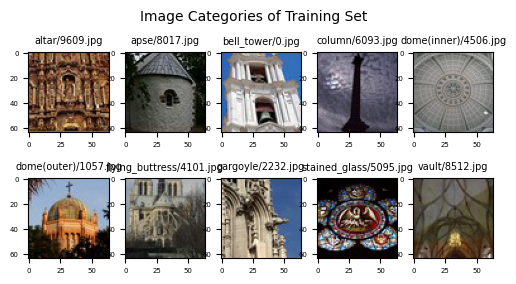

In [9]:
'''Read the data - Display some of the  images in a grid'''
fig, ax = plt.subplots(nrows=2, # figure with 2 rows
                       ncols=int(len(files)/2), # figure with 5 columns
                       figsize=(6,3)) # set the figure size
# title the figure
fig.suptitle('Image Categories of Training Set', fontsize=10)

x1 = 0 # initialize the first index
x2 = 0 # initialize the second index

for img in files: # for each image in the list
    l = img[17:] # get the label of the image
    i = plt.imread(img) # read the image
 
    ax[x1][x2].imshow(i) # display the image
    ax[x1][x2].tick_params(axis='both', labelsize=5) # set the tick parameters
    ax[x1][x2].set_title(l,fontsize=7) # set the title of the image
    x2 = x2+1 # increment the second index
    if x2 > 4: # if the second index is greater than 4
        x2 = 0 # set the second index to 0
        x1 = 1 # set the first index to 1
plt.show() # display the image

In [16]:
# '''Create the CSV files for the images'''
# base_dir = './heritage' # base directory where images are stored
# train_dir = os.path.join(base_dir, "train") # Train directory
# test_dir = os.path.join(base_dir, "test") # Test directory

# # Function to create a dataframe
# def create_dataframe(dir): # take in the directory as an argument
#     data = [] # create an empty list
#     for folder in os.listdir(dir): # loop through the directory
#         folder_path = os.path.join(dir, folder) # get the path of the directory
#         if os.path.isdir(folder_path): # if the folder path is a directory
#             for file in os.listdir(folder_path): # loop through the files in the folder
#                 data.append([file, folder]) # append the file (feature) and folder (category) to the data list
#     return pd.DataFrame(data, columns=["filename", "label"]) # return the data as a dataframe


# # Create the CSV files
# if os.path.exists(train_dir) and os.path.exists(test_dir): # check if the train and test directories exist
#     # Create dataframes for train and test
#     train_df = create_dataframe(train_dir) # create a dataframe for the train directory
#     test_df = create_dataframe(test_dir) # create a dataframe for the test directory

#     # Save to CSV files in the heritage directory
#     train_csv_path = os.path.join(base_dir, "train.csv")
#     test_csv_path = os.path.join(base_dir, "test.csv")

#     # Save the dataframes to CSV files
#     train_df.to_csv(train_csv_path, index=False) # save the train dataframe to a csv file
#     test_df.to_csv(test_csv_path, index=False) # save the test dataframe to a csv file

#     # Print the first 5 rows of the dataframes
#     print("CSV files created successfully.") # print that the csv files were created successfully
#     print(train_df.head()) # print the first 5 rows of the train dataframe
#     print(test_df.head()) # print the first 5 rows of the test dataframe

#     # Read in the train and test labels from the original CSV files and assign them to variables
#     train_labels = pd.read_csv('./heritage/train.csv') # Read in the train labels
#     test_labels = pd.read_csv('./heritage/test.csv') # Read in the test labels
# else:
#     print("CSV generation failed.") # print that the train or test directory does not exist

In [17]:
# '''Define the label mapping (Change to OneHotEncoding if this fails)'''

# # Define the label mapping
# label_mapping = {
#     "bell_tower": 0,
#     "dome(outer)": 1,
#     "gargoyle": 2,
#     "flying_buttress": 3,
#     "dome(inner)": 4,
#     "stained_glass": 5,
#     "column": 6,
#     "apse": 7,
#     "vault": 8,
#     "altar": 9
# }

# # Function to encode labels
# def encode_labels(dataframe): # take in the dataframe as an argument
#     dataframe['label'] = dataframe['label'].map(label_mapping) # map the labels in the CSV to the label mapping
#     return dataframe # return the encoded dataframe

# # Create the encoded CSV files
# if os.path.exists(train_dir) and os.path.exists(test_dir): # check if the train and test directories exist
#     # Encode the labels and store the encoded dataframes in variables
#     train_encoded_df = encode_labels(train_labels.copy()) # encode the train labels and store the dataframe in a variable
#     test_encoded_df = encode_labels(test_labels.copy()) # encode the test labels and store the dataframe in a variable

#     # Save to CSV files in the heritage directory
#     train_encoded_csv_path = os.path.join(base_dir, "train_encoded.csv")
#     test_encoded_csv_path = os.path.join(base_dir, "test_encoded.csv")

#     # Turn the encoded dataframes into CSV files
#     train_encoded_df.to_csv(train_encoded_csv_path, index=False) # save the encoded train labels
#     test_encoded_df.to_csv(test_encoded_csv_path, index=False) # save the encoded test labels

#     # Print the first 5 rows of the dataframes
#     print("CSV files created successfully.") # print that the csv files were created successfully
#     print(train_encoded_df.head()) # print the first 5 rows of the train dataframe
#     print(test_encoded_df.head()) # print the first 5 rows of the test dataframe

#     # Read in the train and test labels from the original CSV files and assign them to variables
#     train_encoded_labels = pd.read_csv('./heritage/train_encoded.csv') # Read in the train labels
#     test_encoded_labels = pd.read_csv('./heritage/test_encoded.csv') # Read in the test labels
# else:
#     print("Encoded CSV generation failed.") # print that the train or test directory does not exist

In [18]:
# '''Let us check a single image file using the destination information'''
# # Print the filenmae of the first image in the train_encoded_labels dataframe
# img = os.path.join(img_path+'/train/'+train_labels['label'][2]+'/'+train_labels['filename'][2]) # use the image path and go into the train directory's train_label dataset and get the 0th item from the filename column
# print(f"Image filename:\n{img}")

# # Display image
# img = plt.imread(img) # read the image
# print(f"\nImage Shape{img.shape}") # read the image shape

# # We need omly one channel as represntative of a image because they are 64x64x3 images
# img =  img[:,:,:3] # get all 3 channels of the image
# print(f"\nSingle channel image shape: {img.shape}") # Display the shape of the image

# # Display the image
# io.imshow(img) # Display the image
# plt.show() # Show the image

In [19]:
# '''
# Create the dataset class to read in data by inheriting the PyTorch Dataset class
# * return 1 datapoint as a tuple - an image and its label
# '''
# class make_dataset(Dataset): # inherit from parent dataset class of PyTorch
#     def __init__(self, img_path, labels, encoded_labels, transforms): # initialize the class with the image path, labels and transforms
#         self.img_path = img_path # store the image path
#         self.labels = labels # store the labels file (test or train labels files)
#         self.encoded_labels = encoded_labels # store the encoded labels
#         self.transforms = transforms # if there are any transforms to be applied
        
#     def __len__(self): # get the length of the dataset
#         return len(self.labels) # return the length of the labels file

#     def __getitem__(self, idx):
#         # Feature opreations
#         img_path = os.path.join(self.img_path, self.labels.iloc[idx, 1], self.labels.iloc[idx, 0]) # get the image path
#         img = io.imread(img_path) # read the image
#         img = img / 255.0  # Normalize the image
#         img = np.moveaxis(img,2,0) # bring the 1 part of the 28x28x1 image to the front (bring position 2 to position 0)
        
#         # Label operations
#         label = self.encoded_labels['label'][idx] # get the encoded label of the image
#         label = np.array(label).reshape(-1,1) # convert the label to a numpy array and reshape to 1 column
            
#         return (torch.from_numpy(img).float(),torch.from_numpy(label).float()) # Return the data as torch tensor
    
#     def __loaddata__(self):
#         set = datasets.ImageFolder(self.img_path, transform = self.transforms) # generate path to the image classes
#         loaded_set = torch.utils.data.DataLoader(set, batch_size=64, shuffle=True) # load the images

#         '''Make sure data is in correct shape'''
#         for l in range(2): # Loop through the first 2 batches
#             img, lab = next(iter(loaded_set)) # Get the next batch for the training set
#             print(img.size(),lab.size()) # Print the size of the image and label
        
#         return loaded_set # return the loaded set

    

In [20]:
'''
Initalize the data transformations - The images in the dataset are all 64x64, so no size transformation
    # For normalization, use mean=[0.4390, 0.4216, 0.4020]
    # For normalization, use std=[0.2130, 0.2131, 0.2275]
'''
train_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

test_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

In [21]:
# Load the dataset
train_set = datasets.ImageFolder(img_path_train, transform = train_transformations) # Load the training data
test_set = datasets.ImageFolder(img_path_test, transform = test_transformations) # Load the test data
print(f"Classes in data:\n{train_set.classes}\n\nLength of Test Set: {len(test_set)}") # Display the length of the test set

Classes in data:
['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

Length of Test Set: 1404


In [22]:
# '''Look at an image while testing the __getitem__ method'''

# # Use "get item" method to get one data point from any index (index = 1 in this example)
# image1, label1 = train_data.__getitem__(1) # get the image and label at index 1
# print(f"Image Shape as read in:{image1.shape}\nImage Type:{type(image1)}\n") # Display the shape of the image and the type of the image
# print(f"The label for this image is: {label1}\n") # Display the label of the image

# image1 = np.array(image1)        #3,64,64 and convert to numpy array
# image1 = np.moveaxis(image1,0,2) #64,64,3 - move back to original shape
# image1 = np.squeeze(image1)      #64,64 - remove the channel dimension

# print(f"Image Shape after moving axis:{image1.shape}\nLabel Shape:{label1.shape}\n") # Display the shape of the image and the label
# print(f"\nThe data point tuple is:{train_data.__getitem__(0)}")

# io.imshow(image1) # Display the image
# plt.title(label1) # Display the label as the title of the image
# plt.show() # Show the image

In [24]:
'''Put into Dataloader using torch library'''
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size =64,shuffle=False)

In [25]:
'''Check if the mini batch is being loaded everytime we call train loader'''
for l in range(2):
    img,lab = next(iter(train_loader))
    print(img.size(),lab.size())

torch.Size([64, 3, 64, 64]) torch.Size([64])
torch.Size([64, 3, 64, 64]) torch.Size([64])


##### Looks like both the batches are what they should be. The channels and sizes look good. Let's build the model!

In [26]:
class CNN(nn.Module): # inherit from the super class nn.Module
    def __init__(self): # constructor of the class
        super(CNN, self).__init__() # call the super class constructor

        '''
        Convolutional layers:
        * Input-Channels: 3 (RGB)
        * Output-Channels: Number of filters where more filters capture more information. Doubling the number of filters is a good practice.
        * Kernal Size: the larger the kernel size, the more information is captured, and the more generalized the model becomes
        * Stride: the larger the stride, the more information is lost (generally set to 1)
        * Padding: the larger the padding, the more information is retained
        '''
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2) # convolutional layer 1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2) # convolutional layer 2
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2) # convolutional layer 3
        
        '''
        Sepcial Layers
        * Dropout Layer: used to prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training time
        * ReLU: Rectified Linear Activation Function - used to introduce non-linearity to the model; usually used after the convolutional layers
        * Maxpooling Layer: used to reduce the spatial dimensions of the output volume
        '''
        self.dropout = nn.Dropout2d(p=0.2) # dropout layer with a dropout rate of 0.2
        self.relu = nn.ReLU() # activation function
        self.maxpool = nn.MaxPool2d(2) # maxpooling layer with a kernel size of 2

        '''
        Fully connected layers
        * Now unravel the images so that we can feed the pixels to the fcns
        * Remember to completely determine the image size before connecting to the fcns.
        * The amount of fcns you choose depends on the accuracy of the model. 
        * If the accuracy is not good, you can add more fcns to improve the accuracy.
        '''
        self.fcn1 = nn.Linear(8*8*64, 1000) # fully connected layer 1
        self.fcn2 = nn.Linear(1000, 250) # fully connected layer 2
        self.fcn3 = nn.Linear(250, 10) # fully connected layer 3
    
    def forward(self, x): # forward function to build the network
        x = self.maxpool(self.relu(self.conv1(x))) # Convolution -> ReLU -> MaxPool [(64 - 5 + 2*2)/1 + 1 = 64 / 2 = 32 => 32x32x16]
        x = self.dropout(self.maxpool(self.relu(self.conv2(x)))) # Convolution -> ReLU -> MaxPool -> Dropout [(32 - 5 + 2*2)/1 + 1 = 32 / 2 = 16 => 16x16x32]
        x = self.maxpool(self.relu(self.conv3(x))) # Convolution -> ReLU -> MaxPool [(16 - 5 + 2*2)/1 + 1 = 16 / 2 = 8 => 8x8x64]

        x = x.view(-1, 8*8*64) # Flatten the image to feed to the fully connected layers
        x = self.dropout(self.relu(self.fcn1(x))) # Fully connected -> ReLU -> Dropout
        x = self.relu(self.fcn2(x)) # Fully connected -> ReLU
        x = self.fcn3(x) # Fully connected

        return(x) # return the output

In [27]:
'''Model Summary'''

model = CNN() # instantiate the model
summary(model,(3,64,64)) # Display the model summary by inputting 3 channels of 64x64 images

'''
Tells you how you built the model:
    * the number of parameters in the model
    * the weights in every convolutional layer that need to get trained in the fully connected layers
    * tells use that there are 6.58 million weights that need to be trained when we train the model
'''

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]           1,216
              ReLU-2           [-1, 16, 64, 64]               0
         MaxPool2d-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]          12,832
              ReLU-5           [-1, 32, 32, 32]               0
         MaxPool2d-6           [-1, 32, 16, 16]               0
         Dropout2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          51,264
              ReLU-9           [-1, 64, 16, 16]               0
        MaxPool2d-10             [-1, 64, 8, 8]               0
           Linear-11                 [-1, 1000]       4,097,000
             ReLU-12                 [-1, 1000]               0
        Dropout2d-13                 [-1, 1000]               0
           Linear-14                  [

'\nTells you how you built the model:\n    * the number of parameters in the model\n    * the weights in every convolutional layer that need to get trained in the fully connected layers\n    * tells use that there are 6.58 million weights that need to be trained when we train the model\n'

In [28]:
'''Instantiate hyperparameters'''
n_epoch = 30 # increase the number of epochs later if the accuracy is not good
lr = 0.001 # typical learning rate for image data
loss_fn = nn.CrossEntropyLoss() # CrossEntropyLoss is used for multiclass classification problems
optimizer = optim.Adam(model.parameters(), lr=lr) # Adam is the go to gradient descent optimizer for deep learning

In [29]:
'''Instantiate containers for storing data'''
train_correct = 0
train_samples = 0
test_correct = 0
test_samples = 0

train_losses = []
test_losses = []

In [30]:
'''
    What we have done so far:
        * Built the dataset class to read in the data
        * Instantiated the data loader to get mini batches of data
        * Built the CNN model architecture to predict and train the model
        * Built the train and test step functions to train and test the model
    Now we are ready to put all of the pre-made functions into a loop and run it.
    Any tweaking should be run for 1 epoch since the models are computationally expensive to run.
    When there is good reduction in the loss and the accuracy is not bad after 1 epoch (sometimes 2 epochs), then we can increase the number of epochs.
'''

for epoch in range(n_epoch): # loop through the number of epochs
    model.train() # set the model to training mode
    for idx,data in enumerate(train_loader): # loop through the training data
        X,y = data # get the data
        
        optimizer.zero_grad() # zero the gradients
        y_pred = model(X) # get the predictions
        
        loss = loss_fn(y_pred.float(),y) # calculate the loss

        _, predicted = torch.max(y_pred, 1) # get the predicted class
        
        # Update the running total of correct predictions and samples
        train_correct += (predicted == y).sum().item() # get the number of correct predictions
        train_samples += y.size(0) # get the number of samples
        
        loss.backward() # backpropagate the loss
        optimizer.step() # update the weights

    model.eval() # set the model to evaluation mode
    with torch.no_grad(): # turn off gradients
        for data in test_loader: # loop through the test data
            images,labels=data[0],data[1] # get the images and labels
            
            outputs=model(images) # get the predictions
            
            test_loss= loss_fn(outputs.float(),labels) # calculate the loss
            
            _, predicted = outputs.max(1) # get the predicted class
            test_samples+= labels.size(0) # get the number of samples
            test_correct += predicted.eq(labels).sum().item() # get the number of correct predictions
        
        
    # Display metrics
    train_losses.append(loss.item()) # append the loss to the train losses
    test_losses.append(test_loss.item()) # append the loss to the test losses
    train_accuracy = 100 * train_correct / train_samples # calculate the training accuracy
    test_accuracy = 100 * test_correct / test_samples # calculate the test accuracy
    print(f"Epoch:{epoch} Train Loss:{loss.item()} Accuracy: {train_accuracy:.2f}% Test Loss: {test_loss.item()} TestAccuracy: {test_accuracy:.2f}%") # print the metrics

Epoch:0 Train Loss:2.0979740619659424 Accuracy: 38.90% Test Loss: 1.6215068101882935 TestAccuracy: 54.34%
Epoch:1 Train Loss:0.8732486963272095 Accuracy: 49.12% Test Loss: 1.2055132389068604 TestAccuracy: 58.05%
Epoch:2 Train Loss:0.7167633771896362 Accuracy: 55.25% Test Loss: 1.2283377647399902 TestAccuracy: 60.11%
Epoch:3 Train Loss:0.7118080258369446 Accuracy: 59.74% Test Loss: 1.1993145942687988 TestAccuracy: 61.82%
Epoch:4 Train Loss:0.7205835580825806 Accuracy: 63.28% Test Loss: 0.7094286680221558 TestAccuracy: 63.63%
Epoch:5 Train Loss:0.8621424436569214 Accuracy: 66.16% Test Loss: 1.4802900552749634 TestAccuracy: 65.11%
Epoch:6 Train Loss:0.7064018845558167 Accuracy: 68.67% Test Loss: 0.9359344244003296 TestAccuracy: 66.38%
Epoch:7 Train Loss:0.2970840036869049 Accuracy: 70.87% Test Loss: 1.1020128726959229 TestAccuracy: 67.32%
Epoch:8 Train Loss:0.3556959331035614 Accuracy: 72.88% Test Loss: 1.0731650590896606 TestAccuracy: 68.04%
Epoch:9 Train Loss:0.3330226540565491 Accuracy

##### Train Loss: 0.0945064127445221 
##### Accuracy: 89.31% 
##### Test Loss: 1.408096432685852 
##### Test Accuracy: 72.76%

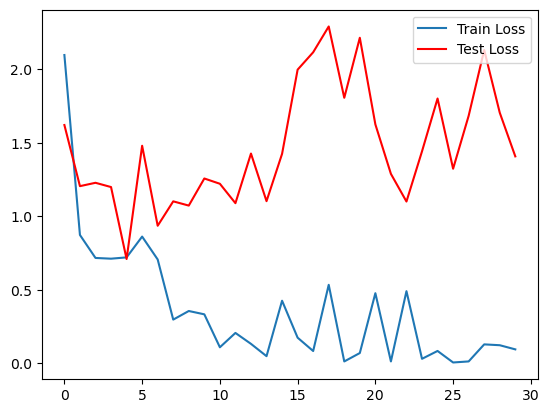

In [34]:
'''Loss Curve Plotting'''
# Plot the loss curve to see how the loss is decreasing with each mini batch

ep = [] # Store number of epochs
for i in range(n_epoch): # loop through the number of epochs
    ep.append(i) # append the epoch number to the list
    
plt.plot(ep,train_losses) # plot the train losses in blue
plt.plot(ep,test_losses,c='r') # plot the test losses in red
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')  # create a legend for the plot
plt.show() # show the plot

# Testing the CNN model architecture 

1. Write a transpose.compose function similar to the one above so that the same processing is done on the image as during training. You can add additional transforms if required or remove some if not required.
2. Then put the model in evaluation mode (model.eval() as done in earlier examples).
3. Additionally you can also 'with torch.no_grad():' and then feed the transformed image to the model and let it predict an output.
4. The output will be a probability value of the classes and you need to pick the output with highest probability value.
5. For implementing pt. 4 above you can use the coomand:   _, predicted_class = torch.max(output, 1)
6. This will give the index of the class with the highest probability value and you have to link it with the actual label. For e.g. If the class predicted is 6 and the corresponding label to that is say "bird" then you write a little python program to print prediction as bird rather than '6' which does not convey much.
7. If you have a bunch of new images, you can run the prediction in a 'for' loop.
<br><br>
These are the basics of how you implement a prediction function or code.

In [36]:
classes = {0:'altar', 1:'apse', 2:'bell_tower', 3:'column', 4:'dome(inner)', 5:'dome(outer)', 6:'flying_buttress', 7:'gargoyle', \
           8:'stained_glass', 9:'vault'}

# First create a transform
transformation_new = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4390, 0.4216, 0.4020], std=[0.2130, 0.2131, 0.2275])
])

# Images given for prediction
image_list = ['altar.jpg','Bell_Tower.jpg','dome_inner.jpg','dome_outer.jpg','stain_glass.jpg']

for i in image_list:
    
    # Read in the image - I am using the PiL library but tou can use skimage or any that works.
    img_new = Image.open(i)
    img_new = transformation_new(img_new)
    
    # Check shape of img
    print(f"Image Shape: {img_new.size()}")
    
    # Add a batch size (1 in this case) as the model expects that shape: batch,channels,size
    img_new = img_new.unsqueeze(0)
    print(f"\nRevised Image Shape: {img_new.size()}")
    
    # Predict using model by putting model in eval mode
    model.eval()
    with torch.no_grad():
        output = model(img_new)
    
    # Get the predicted class
    _, predicted_class = torch.max(output, 1)
    print(f'Predicted class: {classes[predicted_class.item()]}\nActual Class: {i}')

Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: vault
Actual Class: altar.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: dome(outer)
Actual Class: Bell_Tower.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: vault
Actual Class: dome_inner.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: dome(outer)
Actual Class: dome_outer.jpg
Image Shape: torch.Size([3, 64, 64])

Revised Image Shape: torch.Size([1, 3, 64, 64])
Predicted class: stained_glass
Actual Class: stain_glass.jpg


### Questions:
1. This time, the challenge I faced was implementing the classification section. Eventually, I figured out how to do it by looking at the hinds from the addemndum for the topic 3 example code rather than just by looking at the example 5 code. Another challenge is the train-test loop where I am not correctly able to see the test accuracy of the model properly.
2. Initially, I had 3 conv layers, 3 fcn, 2 maxpool, with activation functions after each one like the example code. When the accuracy was not what I wanted, I added a dropout layer to the fully connected network, added maxpool layers to every conv layer, and removed the final ReLU activate function, and changed the first output channel from 32 to 16.
3. To develop the train test loop, I used the example code to help me. When I was not able to see the training accuracy at each epoch, I took some of the code from the test loop and inserted it to the training loop. I computd the error first, then I trained the model and immiedietly tested it. I also tracked the elapsed time. The final training accuracy ended up being what I wanted (99% > 70%).
4. I got 3 out of 5 predictions correct. I know the guidelines asked for 4 out of 5 correct, however, since the accuracy was 76%, this is to be expected.